# Experiments with regression trees

In [2]:
import numpy as np
import pylab as pl
import models

## Generate synthetic data 
Simulate data from crazy function and add Gaussian noise.
n is the number of examples to simulate.

In [5]:
def generate_synthetic_1d_data(n):
    X = np.random.uniform(-20, 20, size=n)
    X.sort()
    # Crazy function without noise
    y_noiseless = np.cos(X) * X
    # Add gaussian noise to each data point
    y = y_noiseless + np.random.normal(0, 1.5, size=n)
    X = X.reshape((n,1))
    return X, y, y_noiseless

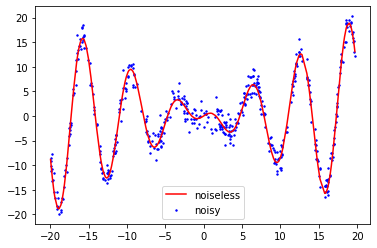

In [7]:
# Simulate 500 data points
X, y, y_noiseless = generate_synthetic_1d_data(500)

pl.scatter(X, y, c='b', s=2, label='noisy');
pl.plot(X, y_noiseless, c='r', label='noiseless')
pl.legend(loc='best');

## Regression trees
Visualize regression tree predictions on sythetic data as a function of the maximum depth (max_depth) of the tree.

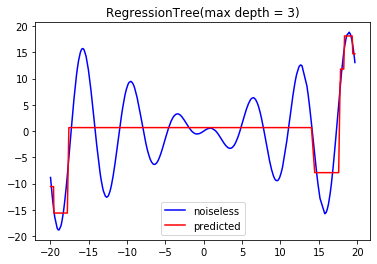

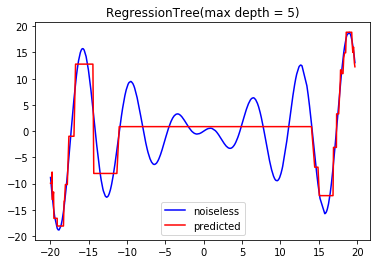

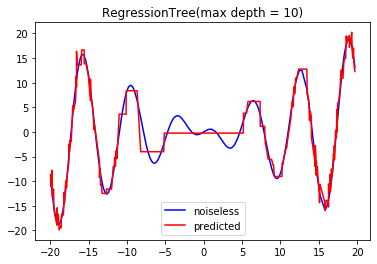

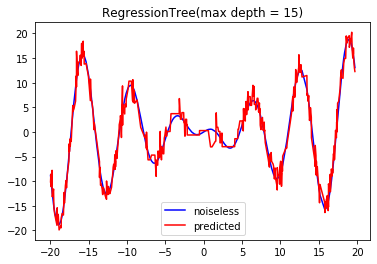

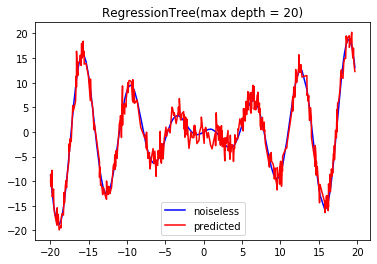

In [8]:
for max_depth in [3, 5, 10, 15, 20]:
    # Fit regression tree
    rt = models.RegressionTree(nfeatures = X.shape[1], max_depth = max_depth)
    rt.fit(X=X, y=y)
    pl.figure()
    pl.title(f'RegressionTree(max depth = {max_depth})')
    # Plot simulated data before noise was added
    pl.plot(X, y_noiseless, c='b', label='noiseless')
    # Plot regression tree predicted values
    pl.plot(X, rt.predict(X), c='r', label='predicted')
    pl.legend(loc='best'); 

## Gradient-boosted regression tree (GBRT) boosting iteration number
Visualize GBRT predictions on sythetic data as a function of the number of number of boosting iterations (n_estimator) used to create the GBRT.

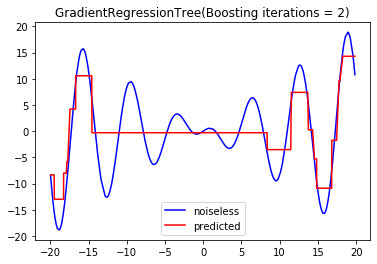

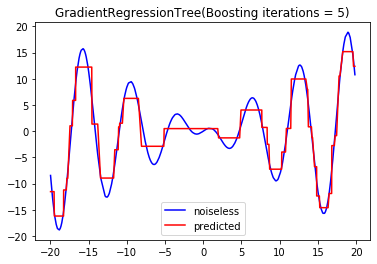

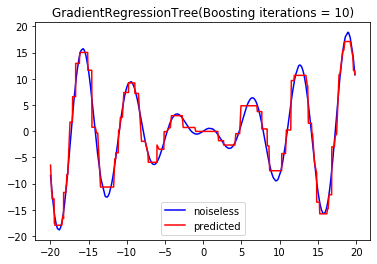

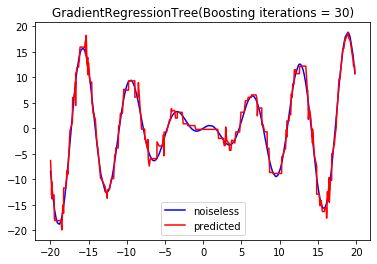

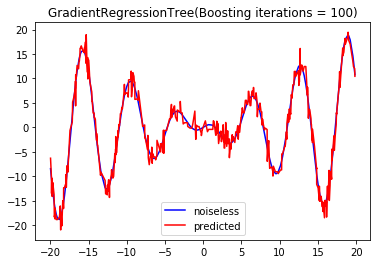

In [12]:
# GBRT hyper-parameters
max_depth=3
regularization_parameter=.75
# Simulate 500 data points
X, y, y_noiseless = generate_synthetic_1d_data(500)

for n_estimator in [2, 5, 10, 30, 100]:
    # Fit the GBR
    gbrt = models.GradientBoostedRegressionTree(
        nfeatures = X.shape[1], 
        max_depth = max_depth, 
        n_estimators = n_estimator, 
        regularization_parameter = regularization_parameter
    )
    gbrt.fit(X=X, y=y)
    pl.figure()
    pl.title(f'GradientRegressionTree(Boosting iterations = {n_estimator})')
    # Plot simulated data before noise was added
    pl.plot(X, y_noiseless, c='b', label='noiseless')
    # Plot regression tree predicted values
    pl.plot(X, gbrt.predict(X), c='r', label='predicted')
    pl.legend(loc='best');


## Gradient-boosted regression tree (GBRT) regularization parameter
Visualize GBRT predictions on sythetic data as a function of the number of number of the regularization parameter

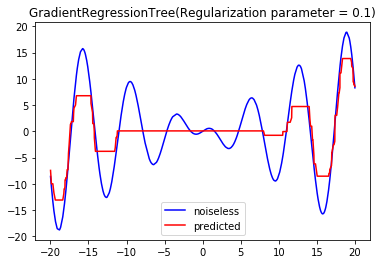

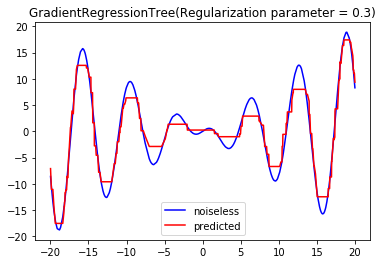

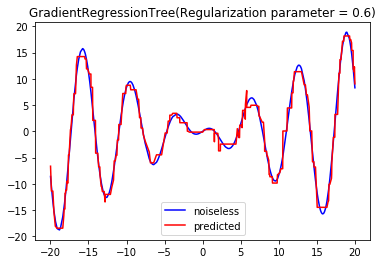

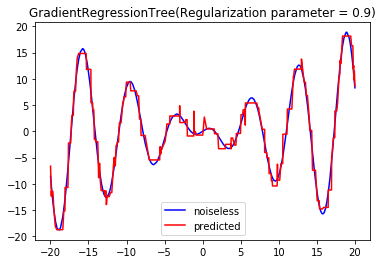

In [10]:
# GBRT hyper-parameters
max_depth=3
n_estimators=20
# Simulate 500 data points
X, y, y_noiseless = generate_synthetic_1d_data(500)

for regularization_parameter in [.1, .3, .6, .9]:
    # Fit the GBR
    gbrt = models.GradientBoostedRegressionTree(
        nfeatures = X.shape[1], 
        max_depth = max_depth, 
        n_estimators = n_estimators, 
        regularization_parameter = regularization_parameter
    )
    gbrt.fit(X=X, y=y)
    pl.figure()
    pl.title(f'GradientRegressionTree(Regularization parameter = {regularization_parameter})')
    # Plot simulated data before noise was added
    pl.plot(X, y_noiseless, c='b', label='noiseless')
    # Plot regression tree predicted values
    pl.plot(X, gbrt.predict(X), c='r', label='predicted')
    pl.legend(loc='best');

## Summary 
At this point, you have successfully run all three experiments in this notebook. Please summarize the emperical results. Try to consider:

1. Explain the qualitative differences in regression learned as a function of depth. Should we set the max depth very high or very low?

As one trains a regression tree with a deeper max_depth parameter, the tree becomes more accurate on the training data. However at a max_depth of 15 the tree predictions begin to mirror the gaussian noise that was generated in the 1st plot - this indicates that the model beginning to learn not only the signal, but the noise as well indicating that the model overfit the data. 

2. Differences in how regression trees and GBRTs fit the data.

GBRTs are able to fit the data better than normal regression trees as one increases the number of iterations (number of learners in the ensemble). Whereas the regression tree overfit relatively quickly with an increase in depth, the GBRT manages to improve its accuracy on the training data signal while not overfitting (at first) since ensemble methods are more resistant to boosting. It is harder to trick M different learners than it is to trick one - however, GBRTs are clearly not immune from overfitting since after 100 iterations (100 learners) the model begins to fit the noise and not just the signal indicating that it is overfitting. 

3. The trade-off between the regularization parameter and the number of boosting iterations in the GBRT.

Based on the results above, an increase in M value yields a better model but can also make the model vulnerable to overfitting at high M values (M=100). Then, at a relatively low M value (M=20) an increase in the regularization parameter gives more "weight" to each learner and thus also exhibits overfitting behavior in the example above. Thus, a lower regularization parameter will limit the weight to each learner effectively preventing overfitting. The two parameters can be thought of in terms of the bias/variance tradeoff where M contributes to an increase in variance and reg. param contributes to an increase in bias. This is why at low reg. param values with M=20 there is a more 'linear looking curve' indicating a higher bias. 